### Labb 2 

- a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder,
glöm inte att lägga till den till .gitignore.

-----


## b)

 - Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os # Used for interacting with the operating system. Essential for file and directory operations.
import random
from PIL import Image # Part of the Pillow library, used for opening, manipulating, and saving many different image file formats.

In [2]:
# Set the directory path where the images are stored.
source_dir = "original_data/train/train"

# List all files in the specified directory and filter to include only '.jpg' files.
image_files = [f for f in os.listdir(source_dir) if f.endswith('.jpg')]

# Randomly select 10 images from the list of jpg files.
selected_images = random.sample(image_files, 10)

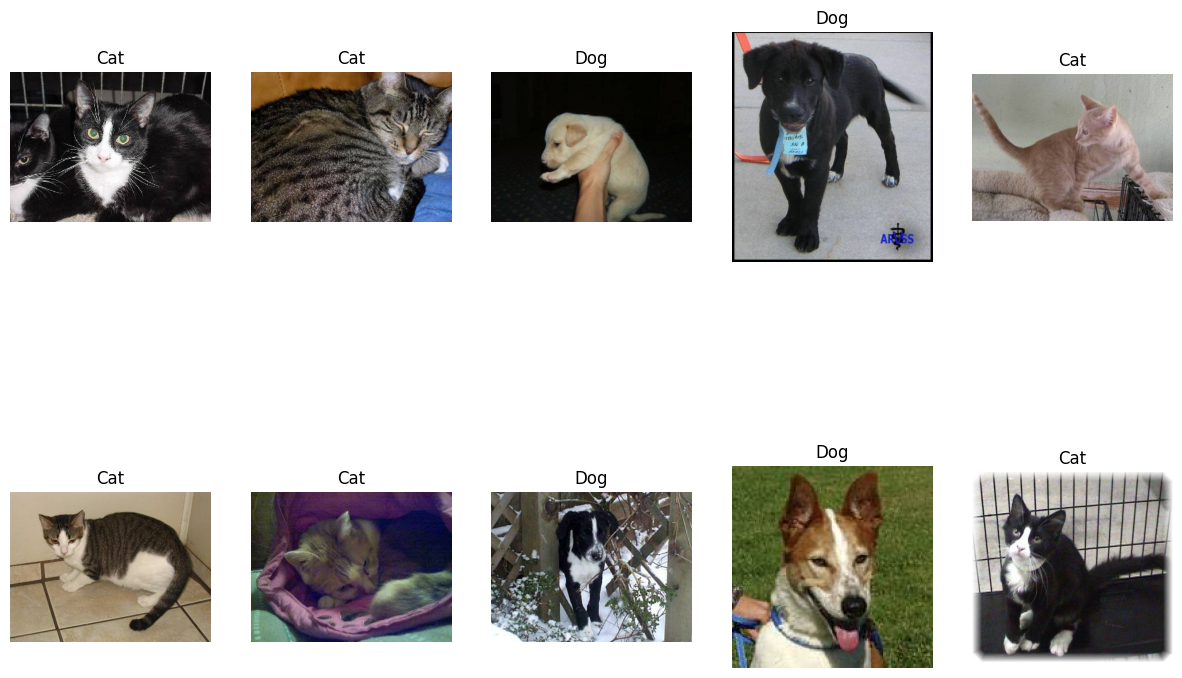

In [3]:
plt.figure(figsize=(15, 10))

# Loop through each selected image file.
for i, image_file in enumerate(selected_images):
    # Open the image file using the PIL library and join path components.
    img = Image.open(os.path.join(source_dir, image_file))
    
    # Determine the label ('Cat' or 'Dog') based on the presence of 'cat' in the file name.
    label = 'Cat' if 'cat' in image_file else 'Dog'
    
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img) # Display the image in the current subplot.
    plt.title(label) # Set the title of the subplot to the label of the image.
    plt.axis('off')

plt.show()

------

## c)

- Skapa folderstrukturen nedan med Python

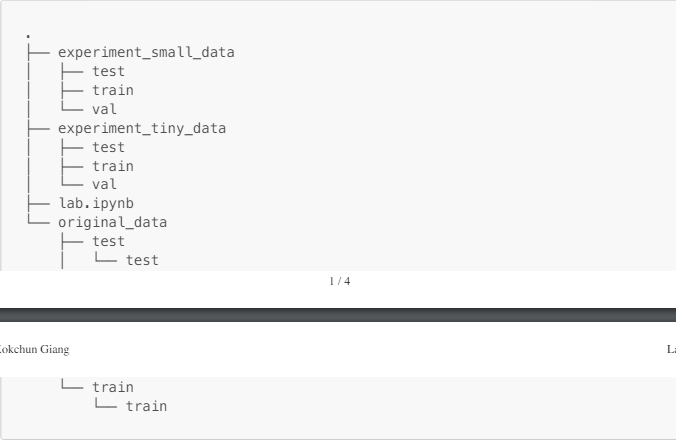     ---->      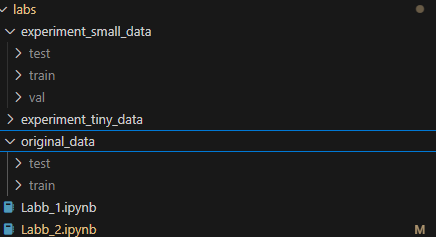
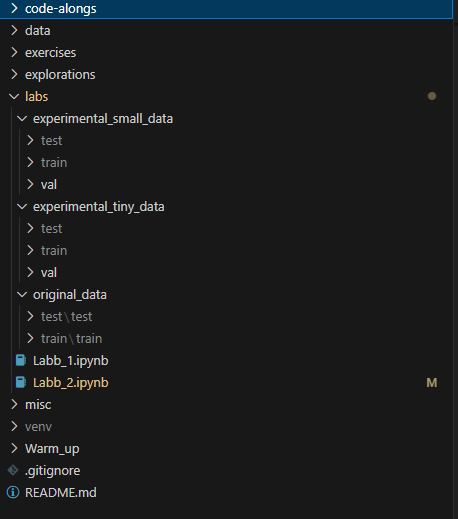

-----

### d)

- d) Nu ska du göra train|val|test split med följande splits:
    - experiment_small
    - train - 1600 (800 dogs, 800 cats)
    - val - 400 (200 dogs, 200 cats)
    - test - 500 (250 dogs, 250 cats)

Det är inte så farligt om det inte blir exakt balanserade dataset.
Det är viktigt att du samplar slumpmässigt utan replacement från originaldatasetet under respektive
experiment. Spara datan i deras respektive mappar. (**)


In [4]:
import shutil

base_dir = "experiment_small_data"
source_dir = "original_data/train/train"  

sets = ['train', 'val', 'test']

# Define number of pics for each category
split_counts = {
    'train': {'dogs': 800, 'cats': 800},
    'val': {'dogs': 200, 'cats': 200},
    'test': {'dogs': 250, 'cats': 250}
}

def check_if_distribution_needed():
    # Check if distributuion already has been done.
    for set in sets:
        path = os.path.join(base_dir, set)
        if sum(len(files) for _, _, files in os.walk(path)) != sum(split_counts[set].values()):
            return True
    return False

def distribute_files():
    if not check_if_distribution_needed():
        print("Fördelning har redan slutförts. Inga ytterligare åtgärder krävs.")
        return

    # shuffle all files for ranodomness
    files = {'dogs': [f for f in os.listdir(source_dir) if 'dog' in f], 'cats': [f for f in os.listdir(source_dir) if 'cat' in f]}
    for category in files:
        random.shuffle(files[category])

    # move files 
    for set in sets:
        for category in files:
            amount = split_counts[set][category]
            selected_files = files[category][:amount]
            files[category] = files[category][amount:]  

            for file in selected_files:
                shutil.move(os.path.join(source_dir, file), os.path.join(base_dir, set, file))

distribute_files()


Fördelning har redan slutförts. Inga ytterligare åtgärder krävs.


In [5]:
directories = ["experiment_small_data/train", "experiment_small_data/test", "experiment_small_data/val"]


def count_files(directory):
    dog_count = sum('dog' in f for f in os.listdir(directory))
    cat_count = sum('cat' in f for f in os.listdir(directory))
    return dog_count, cat_count


for directory in directories:
    dogs, cats = count_files(directory)
    print(f"{directory}:")
    print("Dogs:", dogs)
    print("Cats:", cats)



experiment_small_data/train:
Dogs: 800
Cats: 800
experiment_small_data/test:
Dogs: 250
Cats: 250
experiment_small_data/val:
Dogs: 200
Cats: 200


----------

### e) 
Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1.
- plotta några bilder med deras respektive labels och kontrollera att det är korrekt.
- skapa lämplig plot för att kontrollera att dataseten är balanserade
- skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex [0, 0, ... 0, 1, 1, ..., 1]




Funktion som laddar bilder från en mapp och extraherar deras labels.
- Blandar ordningen på filnamnen. Detta säkerställer att ordningen på filerna i mappen är slumpmässig innan bilderna laddas och etiketterna extraheras
- Loopar igenom filer i mapp (directory).
- Laddar varje bild och konverterar den till en numpy-array.
- Hämtar etiketten för varje bild baserat på filnamnet (om "dog" finns i filnamnet sätts etiketten till 0, annars sätts den till 1).
- Returnerar bilder och etiketter som numpy-arrays.

Etiketterna för bilderna i tränings-, validerings- och testmapparna konverteras till one-hot encoding-formatet.



In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical


def load_images_and_labels(directory):
    # Get a list of filenames in the directory
    file_names = os.listdir(directory)
    # Shuffle the list to randomize the order of files
    random.shuffle(file_names)
    
    # Using list comprehension to load images and create labels
    images = []
    labels = []
    for file in file_names:
        if os.path.isfile(os.path.join(directory, file)):
            try:
                img_path = os.path.join(directory, file)
                img = load_img(img_path)
                img_array = img_to_array(img) / 255.0  # Normalize the image
                images.append(img_array)
                labels.append(0 if 'dog' in file else 1)
            except Exception as e:
                print(f"Error loading image: {img_path}. {e}")

    return images, np.array(labels)

# Directory paths
train_dir = "experiment_small_data/train"
val_dir = "experiment_small_data/val"
test_dir = "experiment_small_data/test"

# Load images and labels from the directories
X_train, y_train = load_images_and_labels(train_dir)
X_val, y_val = load_images_and_labels(val_dir)
X_test, y_test = load_images_and_labels(test_dir)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)






plotta några bilder med deras respektive labels och kontrollera att det är korrekt
- ser korrekt ut

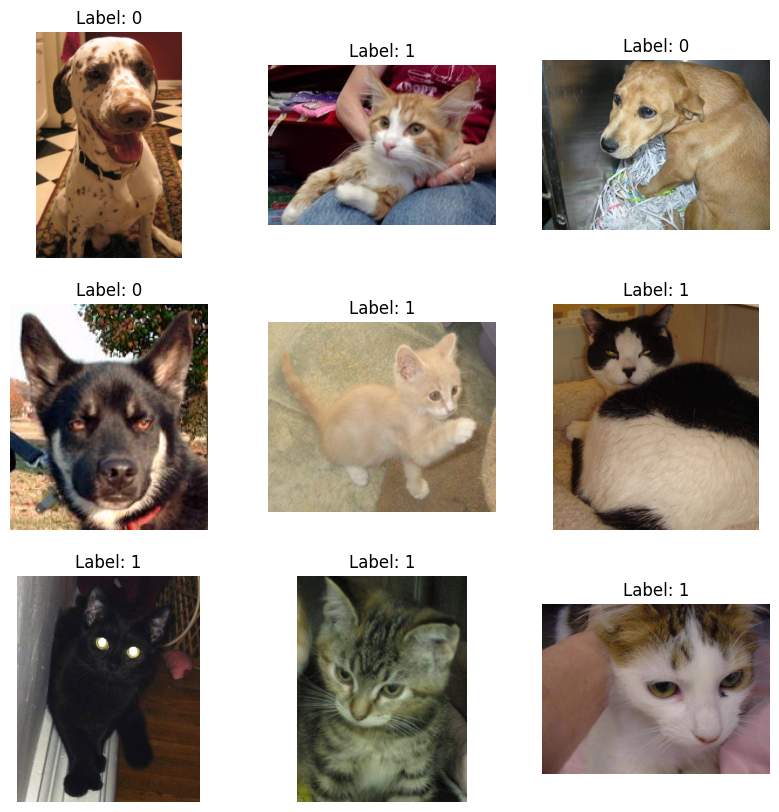

In [7]:
num_images = 9  
plt.figure(figsize=(10, 10))

# Pick random images from training folder
train_files = os.listdir(train_dir)
random_files = np.random.choice(train_files, size=num_images, replace=False)

for i, file in enumerate(random_files):
    img_path = os.path.join(train_dir, file)
    img = load_img(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    
    # get label 
    label_index = 0 if 'dog' in file.split('.')[0] else 1  # 0 for dog 1 for cat
    plt.title("Label: " + str(label_index))  
    plt.axis("off")

plt.show()

skapa lämplig plot för att kontrollera att dataseten är balanserade


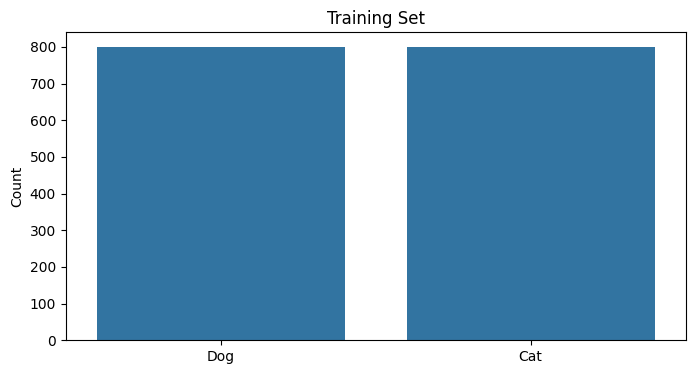

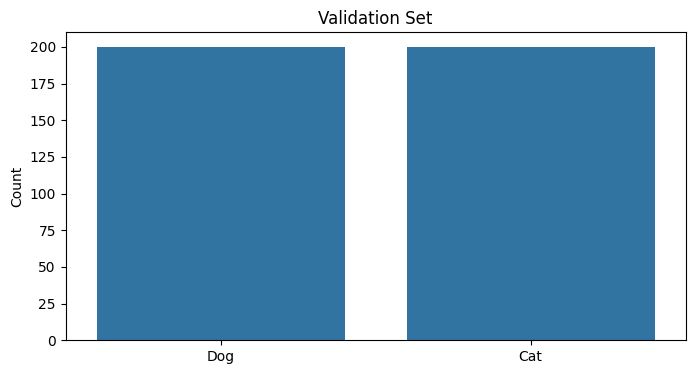

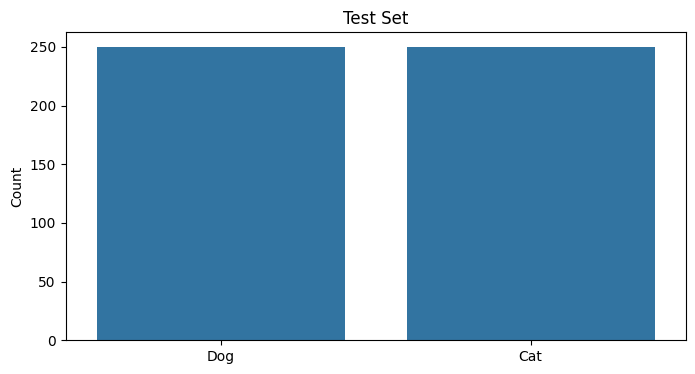

In [8]:
def plot_class_distribution(y_data, title):
    
    class_sums = np.sum(y_data, axis=0)
    classes = ['Dog', 'Cat']
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=classes, y=class_sums)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()


plot_class_distribution(y_train, "Training Set")
plot_class_distribution(y_val, "Validation Set")
plot_class_distribution(y_test, "Test Set")




skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex
[0, 0, ... 0, 1, 1, ..., 1]

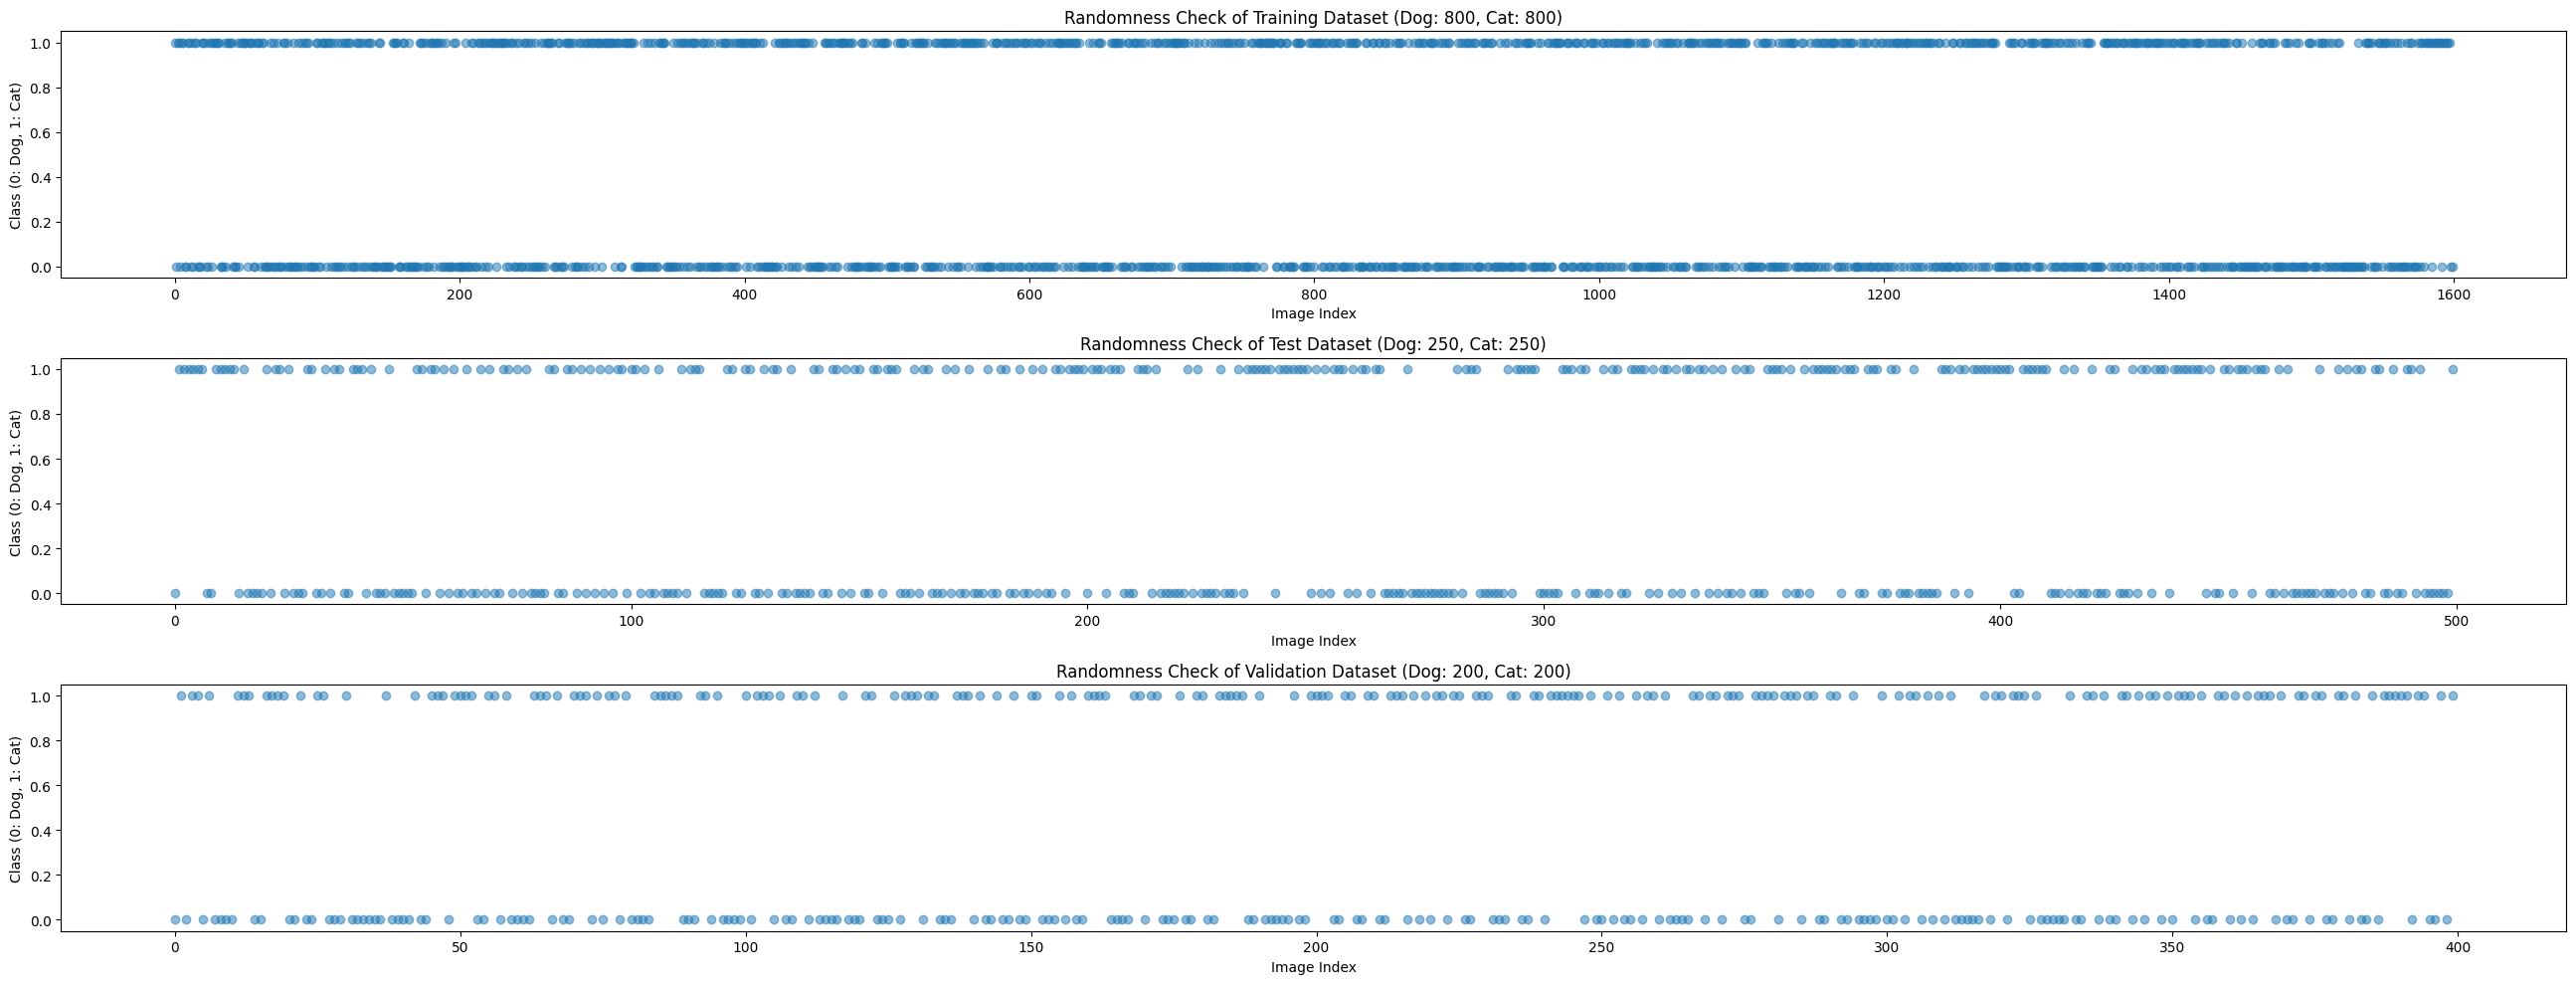

In [9]:
# Count the occurrences of each class in the training, test, and validation data
train_class_counts = np.bincount(y_train.argmax(axis=1))
test_class_counts = np.bincount(y_test.argmax(axis=1))
val_class_counts = np.bincount(y_val.argmax(axis=1))

# Create three line plots to show the distribution of classes in the training, test, and validation data
plt.figure(figsize=(26, 10))

# Training data
plt.subplot(3, 1, 1)
plt.plot(range(len(y_train)), y_train.argmax(axis=1), marker='o', linestyle='', alpha=0.5)
plt.title(f'Randomness Check of Training Dataset (Dog: {train_class_counts[0]}, Cat: {train_class_counts[1]})')
plt.xlabel('Image Index')
plt.ylabel('Class (0: Dog, 1: Cat)')

# Test data
plt.subplot(3, 1, 2)
plt.plot(range(len(y_test)), y_test.argmax(axis=1), marker='o', linestyle='', alpha=0.5)
plt.title(f'Randomness Check of Test Dataset (Dog: {test_class_counts[0]}, Cat: {test_class_counts[1]})')
plt.xlabel('Image Index')
plt.ylabel('Class (0: Dog, 1: Cat)')

# Validation data
plt.subplot(3, 1, 3)
plt.plot(range(len(y_val)), y_val.argmax(axis=1), marker='o', linestyle='', alpha=0.5)
plt.title(f'Randomness Check of Validation Dataset (Dog: {val_class_counts[0]}, Cat: {val_class_counts[1]})')
plt.xlabel('Image Index')
plt.ylabel('Class (0: Dog, 1: Cat)')

plt.tight_layout()
plt.show()





-----

### 1. Bildbehandling (*)

Uppgifterna nedan ska upprepas för respektive experimentdataset om du också väljer att arbeta med
tinydatasetet.
- a) Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot.
- b) Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver
slänga bilder. Hur kommer du fram till ditt val?
- c) Gör resize sådant att samtliga bilder är samma storlek och spara dem i numpy arrays med följande
struktur:
(samples, row, cols, color_channels)
Visualisera därefter ett par styckena bilder.
- d) Augmentera datan. Varför behövs dataaugmentering och hur beslutar du vilka parametrar du valt för
augmenteringen?

Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot.

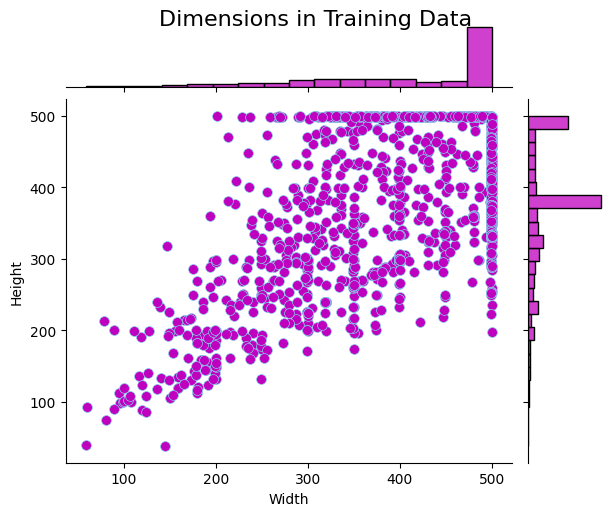

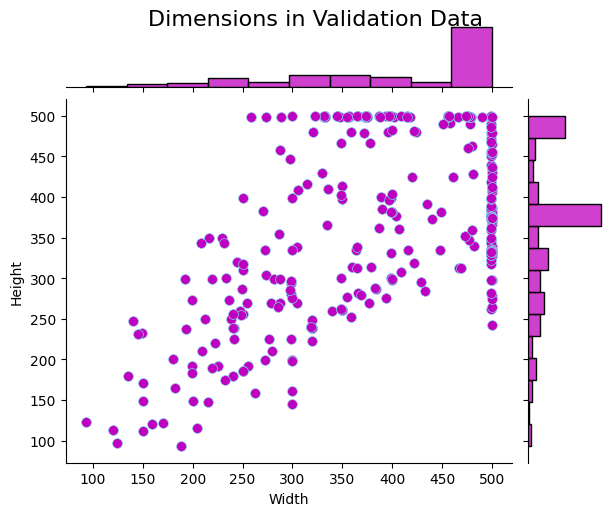

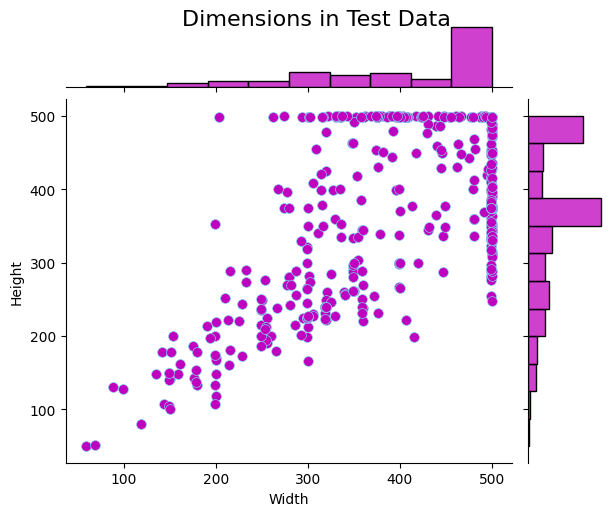

In [10]:
def plot_image_dimensions(X, title, plot_height=6):
    
    # Extract the heights and widths of all images in the dataset
    heights = [img.shape[0] for img in X]
    widths = [img.shape[1] for img in X]

    # Create a DataFrame to hold the heights and widths
    data = pd.DataFrame({'Height': heights, 'Width': widths})

    # Create a scatter plot to visualize the distribution of image dimensions
    g = sns.jointplot(data=data, x='Width', y='Height', kind='scatter', color='m', s=50, edgecolor="skyblue", linewidth=0.5, height=plot_height)
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.95)  

    # Set the figure dimensions
    g.fig.set_figwidth(6)  
    g.fig.set_figheight(5)  

    plt.show()


plot_image_dimensions(X_train, 'Dimensions in Training Data', plot_height=8)
plot_image_dimensions(X_val, 'Dimensions in Validation Data', plot_height=8)
plot_image_dimensions(X_test, 'Dimensions in Test Data', plot_height=8)



Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver
slänga bilder. Hur kommer du fram till ditt val?

- Då det verkar som att de flesta eller iaf många bilder ligger i det högre spannet av 500 i antingen height eller width så kanske den storleken är för stor för modellen senare!?. Jag tänker att kanske runt 256x256 borde vara en okej storlek och då bör väl detaljerna bevaras utan att vara för stor så beräkningarna tar för lång tid.


Gör resize sådant att samtliga bilder är samma storlek och spara dem i numpy arrays med följande
struktur:
(samples, row, cols, color_channels)

Ändra Storlek på Bilderna till 256x256 och konverterar listan av bilder till en 4d array med shapen (samples, rows, cols, color_channels)

In [11]:
from PIL import Image
import numpy as np

def process_images(image_list, target_size=(256, 256)):
    # Resize and normalize each image in the list
    # Convert the image to 0-255 range and to uint8 type
    # Create a PIL Image object from the numpy array
    # Resize the image to the target size
    # Normalize the resized image back to 0-1 range
    return np.array([np.array(Image.fromarray((img * 255).astype('uint8')).resize(target_size, Image.Resampling.LANCZOS)) / 255.0 for img in image_list]) # Chatgpt helped me with this list comprehension.

# Process and resize images in the training, val and test dataset
X_train_resized = process_images(X_train)
X_val_resized = process_images(X_val)
X_test_resized = process_images(X_test)

# Check the shape of the resized arrays
print("Train Data Shape:", X_train_resized.shape)
print("Validation Data Shape:", X_val_resized.shape)
print("Test Data Shape:", X_test_resized.shape)




Train Data Shape: (1600, 256, 256, 3)
Validation Data Shape: (400, 256, 256, 3)
Test Data Shape: (500, 256, 256, 3)


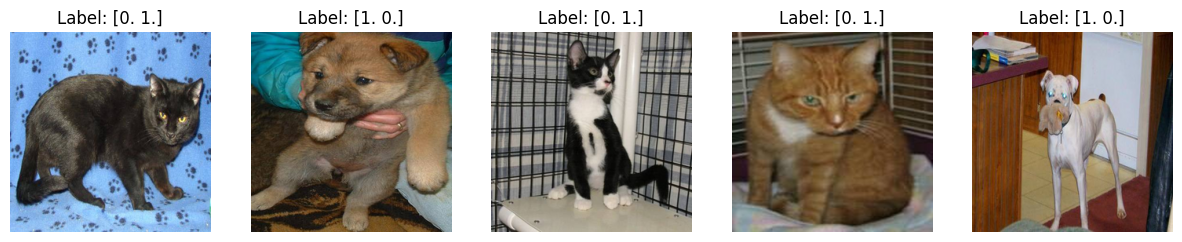

In [12]:

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train_resized[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


------

### 2. Träna modeller (*)
För uppgifterna nedan, jobba med dataseten en åt gången:
small
utan augmentering

- a) Använd följande nätverk och träna på datan. Gör hyperparametertuning för några parametrar (beskriv
hur du gör). Visualisera och analysera loss-kurvor, accuracy-kurvor.

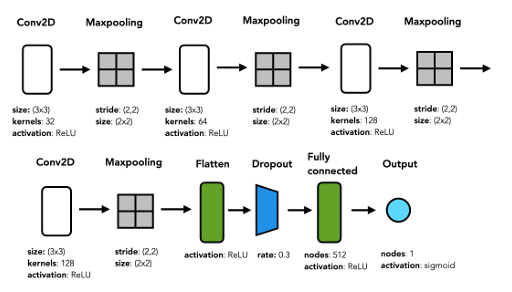

- c) Välj en modell, träna på tränings- och valideringsdatan. Gör inferens på testdatan och utvärdera din
modell.

### a)

- Följande kod tränar datan genom modellen som är lite tweakad från den som finns alldeles ovanför här då den gav en hel del fel för mig. 

- Efter modellen så beräknas antalet steg per epok och valideringssteg baserat på storleken av tränings- och valideringsdatan samt batchstorleken. 
Genom att definiera steps_per_epoch och validation_steps ser jag till att hela datasetet används under varje epok.

- Skapar en callback för att stoppa träningen tidigt om valideringsförlusten inte förbättras under 15 epoker.

- Konverterar tränings- och valideringsdatan till TensorFlow Dataset-objekt, shuffle träningsdatan, batchar dem med storlek 32 och repetera dem för kontinuerlig användning under träning.

- Tränar modellen med träningsdatan och valideringsdatan, med hjälp av early stopping callback.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam

def CNN_model(learning_rate=0.0001, drop_rate=0.5, kernel_config=[32, 64, 128, 128]):
    adam = Adam(learning_rate=learning_rate)

    model = Sequential(name="CNN_model")
    model.add(Input(shape=(256, 256, 3))) # Add an input layer with the specified input shape
    model.add(Conv2D(kernel_config[0], kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal")) # Add the first Conv2D layer
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2)) # Add the first MaxPooling2D layer
    
    # Add additional Conv2D and MaxPooling2D layers based on kernel_config
    for kernels in kernel_config[1:]:
        model.add(Conv2D(kernels, kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    model.add(Flatten()) # Flatten the output from the convolutional layers
    model.add(Dropout(drop_rate)) # Add a Dropout layer to prevent overfitting
    model.add(Dense(512, activation="relu", kernel_initializer="he_normal")) # Add a Dense (fully connected) layer with 512 units
    model.add(Dense(2, activation="softmax")) # Add the output layer with 2 units (for binary classification) and softmax activation

    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

    return model


model = CNN_model()
model.summary()


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,087,426 (49.92 MB)

 Trainable params: 13,087,426 (49.92 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=15) # Define early stopping callback to stop training when validation loss doesn't improve

# Calculate steps per epoch and validation steps
steps_per_epoch = len(X_train_resized) // 32 + 1
validation_steps = len(X_val_resized) // 32 + 1

# Create TensorFlow datasets for training and validation data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resized, y_train)).shuffle(buffer_size=1600).batch(32).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_resized, y_val)).batch(32).repeat()

# Train the model
history_no_aug = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,  
    epochs=100,
    validation_data=val_dataset,
    validation_steps=validation_steps,  
    callbacks=[early_stopping]
)


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 459ms/step - accuracy: 0.5379 - loss: 1.9055 - val_accuracy: 0.5175 - val_loss: 0.6913
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 443ms/step - accuracy: 0.6068 - loss: 0.6762 - val_accuracy: 0.5100 - val_loss: 0.6906
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 441ms/step - accuracy: 0.6545 - loss: 0.6325 - val_accuracy: 0.6300 - val_loss: 0.6462
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 449ms/step - accuracy: 0.6584 - loss: 0.5900 - val_accuracy: 0.6400 - val_loss: 0.6400
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 484ms/step - accuracy: 0.7500 - loss: 0.5378 - val_accuracy: 0.6575 - val_loss: 0.6591
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 463ms/step - accuracy: 0.7881 - loss: 0.4714 - val_accuracy: 0.6225 - val_loss: 0.7119
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 446ms/step - accuracy: 0.7821 - loss: 0.4483 - val_accuracy: 0.6600 - val_loss: 0.7053
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 448ms/step - accuracy: 0.8574 - loss: 0.3538 - 

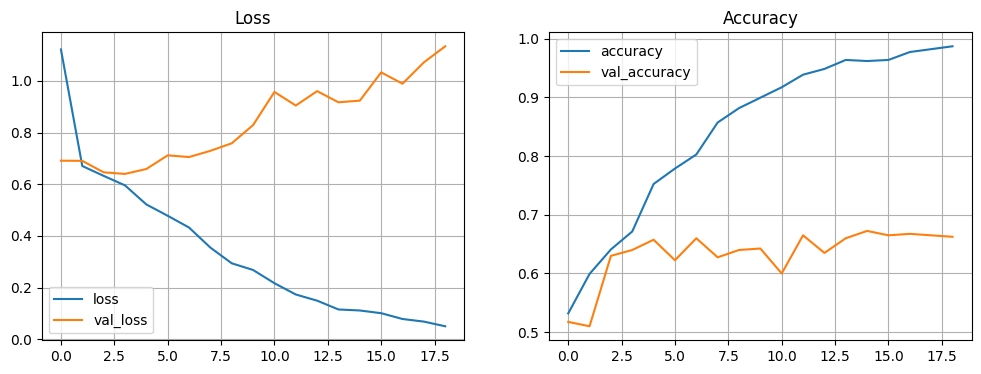

In [15]:
metrics = pd.DataFrame(history_no_aug.history)

def plot_metrics(metrics):
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    metrics[["loss", "val_loss"]].plot(ax=ax[0], title="Loss", grid=True)
    metrics[["accuracy", "val_accuracy"]].plot(ax=ax[1], title="Accuracy", grid=True)
    
plot_metrics(metrics)


plt.show()
    

Gör hyperparametertuning för några parametrar (beskriv
hur du gör). Visualisera och analysera loss-kurvor, accuracy-kurvor.

Valde att ändra inlärningshastigheten (learning rate) och batchstorleken.
   - Ändrade inlärningshastigheten från 0.0001 till 0.0005.
   - Ändrade batchstorleken från 32 till 64.
   

första träningens hyperparametrar och resultat 


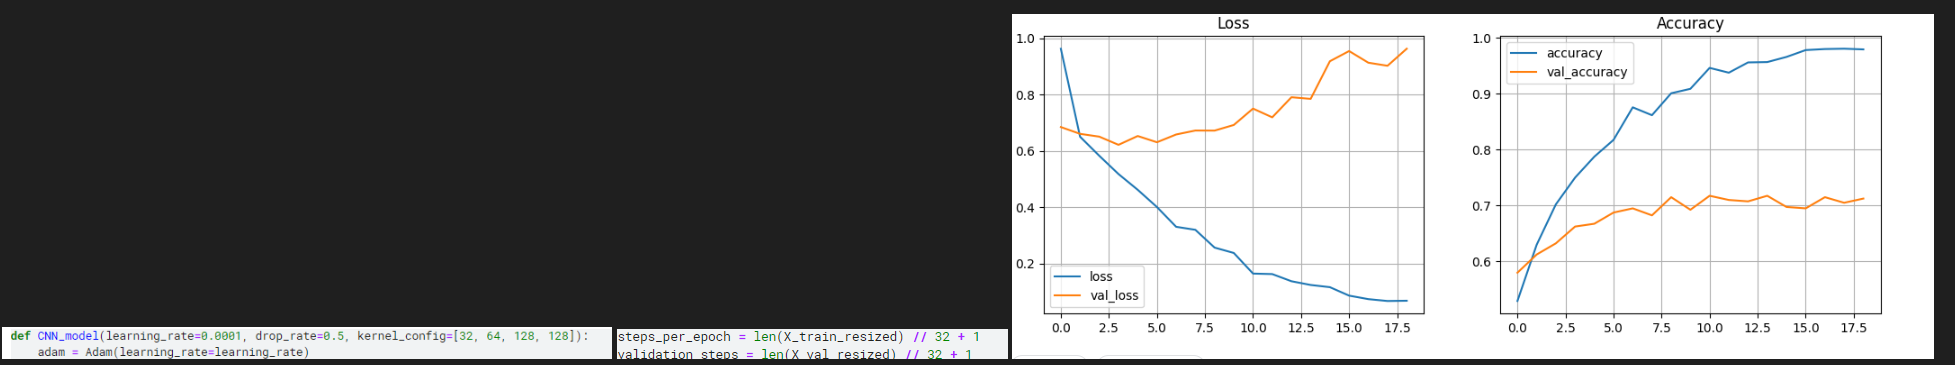

andra träningens ändrade hyperparametrar och resultat

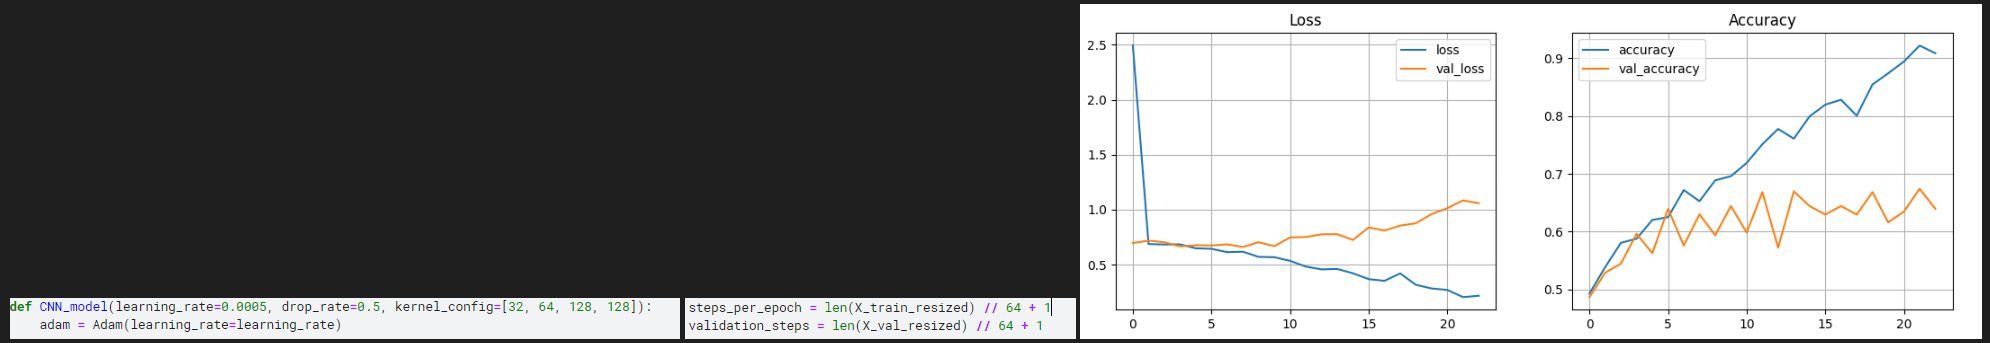

### Ursprungliga Kurvor

(Loss)
- Träningsförlust: Minskade stadigt.
- Valideringsförlust: Ökade efter några epoch, vilket tyder på överanpassning.

(Accuracy)
- Träningsnoggrannhet: Ökade stadigt till höga nivåer.
- Valideringsnoggrannhet: Fluktuerade och var betydligt lägre än träningsnoggrannheten.

### Nya Kurvor efter Hyperparametertuning

(Loss)
- Träningsförlust: Minskade fortsatt stadigt.
- Valideringsförlust: Ökade fortfarande efter några epoch, men kanske långsammare.

(Accuracy)
- Träningsnoggrannhet: Ökade stadigt och nådde över 0.9.
- Valideringsnoggrannhet: Stabiliserades runt 0.6-0.7.

### Slutsats

- Förlust: Modellen lär sig bra på träningsdata, men överanpassar.
- Noggrannhet: Modellen presterar ok på träningsdata.

-----

Välj en modell, träna på tränings- och valideringsdatan. Gör inferens på testdatan och utvärdera din
modell.

Väljer den första modellen. 
- def CNN_model(learning_rate=0.0001, drop_rate=0.5, kernel_config=[32, 64, 128, 128]):


kombinerar datasetet train och val. tränar dom ihop.

In [16]:
# combine train and val.
X_combined = np.concatenate((X_train_resized, X_val_resized), axis=0)
y_combined = np.concatenate((y_train, y_val), axis=0)

early_stopping = EarlyStopping(monitor="loss", mode="min", patience=10)

# Create dataset for combined data
combined_dataset = tf.data.Dataset.from_tensor_slices((X_combined, y_combined)).shuffle(buffer_size=1600).batch(64).repeat()

steps_per_epoch = len(X_combined) // 64 + 1

# Train with combined data
history_combined = model.fit(
    combined_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 776ms/step - accuracy: 0.9354 - loss: 0.2061
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 786ms/step - accuracy: 0.9450 - loss: 0.1552
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 781ms/step - accuracy: 0.9742 - loss: 0.0898
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 788ms/step - accuracy: 0.9841 - loss: 0.0597
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 792ms/step - accuracy: 0.9884 - loss: 0.0484
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 786ms/step - accuracy: 0.9868 - loss: 0.0556
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 779ms/step - accuracy: 0.9936 - loss: 0.0342
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 784ms/step - accuracy: 0.9942 - loss: 0.0330
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 781ms/step - accuracy: 0.9947 - loss: 0.0219
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 777ms/step - accuracy: 0.9959 - loss: 0.0225
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 779ms/step - accuracy: 0.9920 - loss: 0.0304
Epoch 12/100
32/32 ━━━━━━━━━━━

Gör inferens på testdatan och utvärdera din
modell.

- Skapar ett tensorflow dataset från testdatan och delar upp det i batcher om 64 bilder.
- Använder den tränade modeller för att göra förutsägelser på testdatan.
- Konverterar modellens förutsägelser till klassetiketter
- konverterar de sanna etiketterna till klassetiketter
- Skapar en förvirringsmatris


In [17]:
# create dataset for testdata
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_resized, y_test)).batch(64)

# predictions
y_pred = model.predict(test_dataset)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step


              precision    recall  f1-score   support

           0       0.71      0.69      0.70       250
           1       0.70      0.72      0.71       250

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.70      0.70      0.70       500



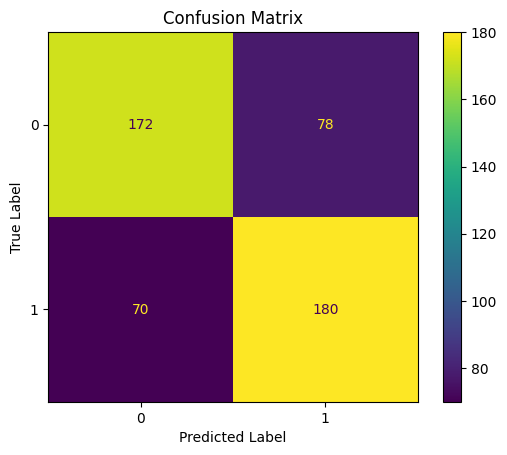

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_test_classes, y_pred_classes))

# Create the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()  


plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Denna utvärdering visar att modellen kan skilja mellan hundar och katter med en ok noggrannhet. Vidare förbättringar skulle kunna göras genom att tex augmentera datan och ändra mer hyperparametrar.

### Sammanfattning

Klurigt och svåraste projektet hittils. Fastnade många gånger på olika problem. Det varit väldigt lärorikt. Märker att jag lär mig mer genom att testa olika saker än när vi tex går igenom saker på lektioner. Finns dock väldigt mycket mer jag behöver lära mig. Fick ta en del hjälp av chatgpt men inte farligt mycket. Då jag var sjuk i två veckor så försvann det en hel del programmeringstid för mig. Jag fokuserade på godkäntdelen och fick den att bli helt ok. Kagglekoden funkar helt i kaggle och labb_2 koden funkar i vscode. har även kört den genom cpun. Det tog en stund men funkade fint. accuracyn hamnade på runt 70 % vilket väl är ok?!. Då jag kommer jobba med AI på min LIA så kommer jag ta lite extrakurser i sommar för att lära mig allt bättre och lära mig mer.